<a href="https://colab.research.google.com/github/andandandand/practical-computer-vision/blob/main/PyTorch_ToImage_and_ToDtype_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial - Digital Image Representation with PIL, NumPy, and PyTorch

#### Author: Antonio Rueda-Toicen

**antonio.rueda.toicen 'at' hpi 'dot' de**


[![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)](http://creativecommons.org/licenses/by/4.0/)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In PyTorch's `transforms.v2`, the `ToImage()` transformation `ToImage()` converts input types like PIL Images, NumPy ndarrays, or tensors into a PyTorch `Image` tensor format (with a common `Channels, Height, Width` shape).
 For batches of images, the format becomes `Batch Size, Channels, Height, Width`.
This format is expected by convolutional layers.




In [1]:
import torch
import torchvision.transforms.v2 as transforms
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

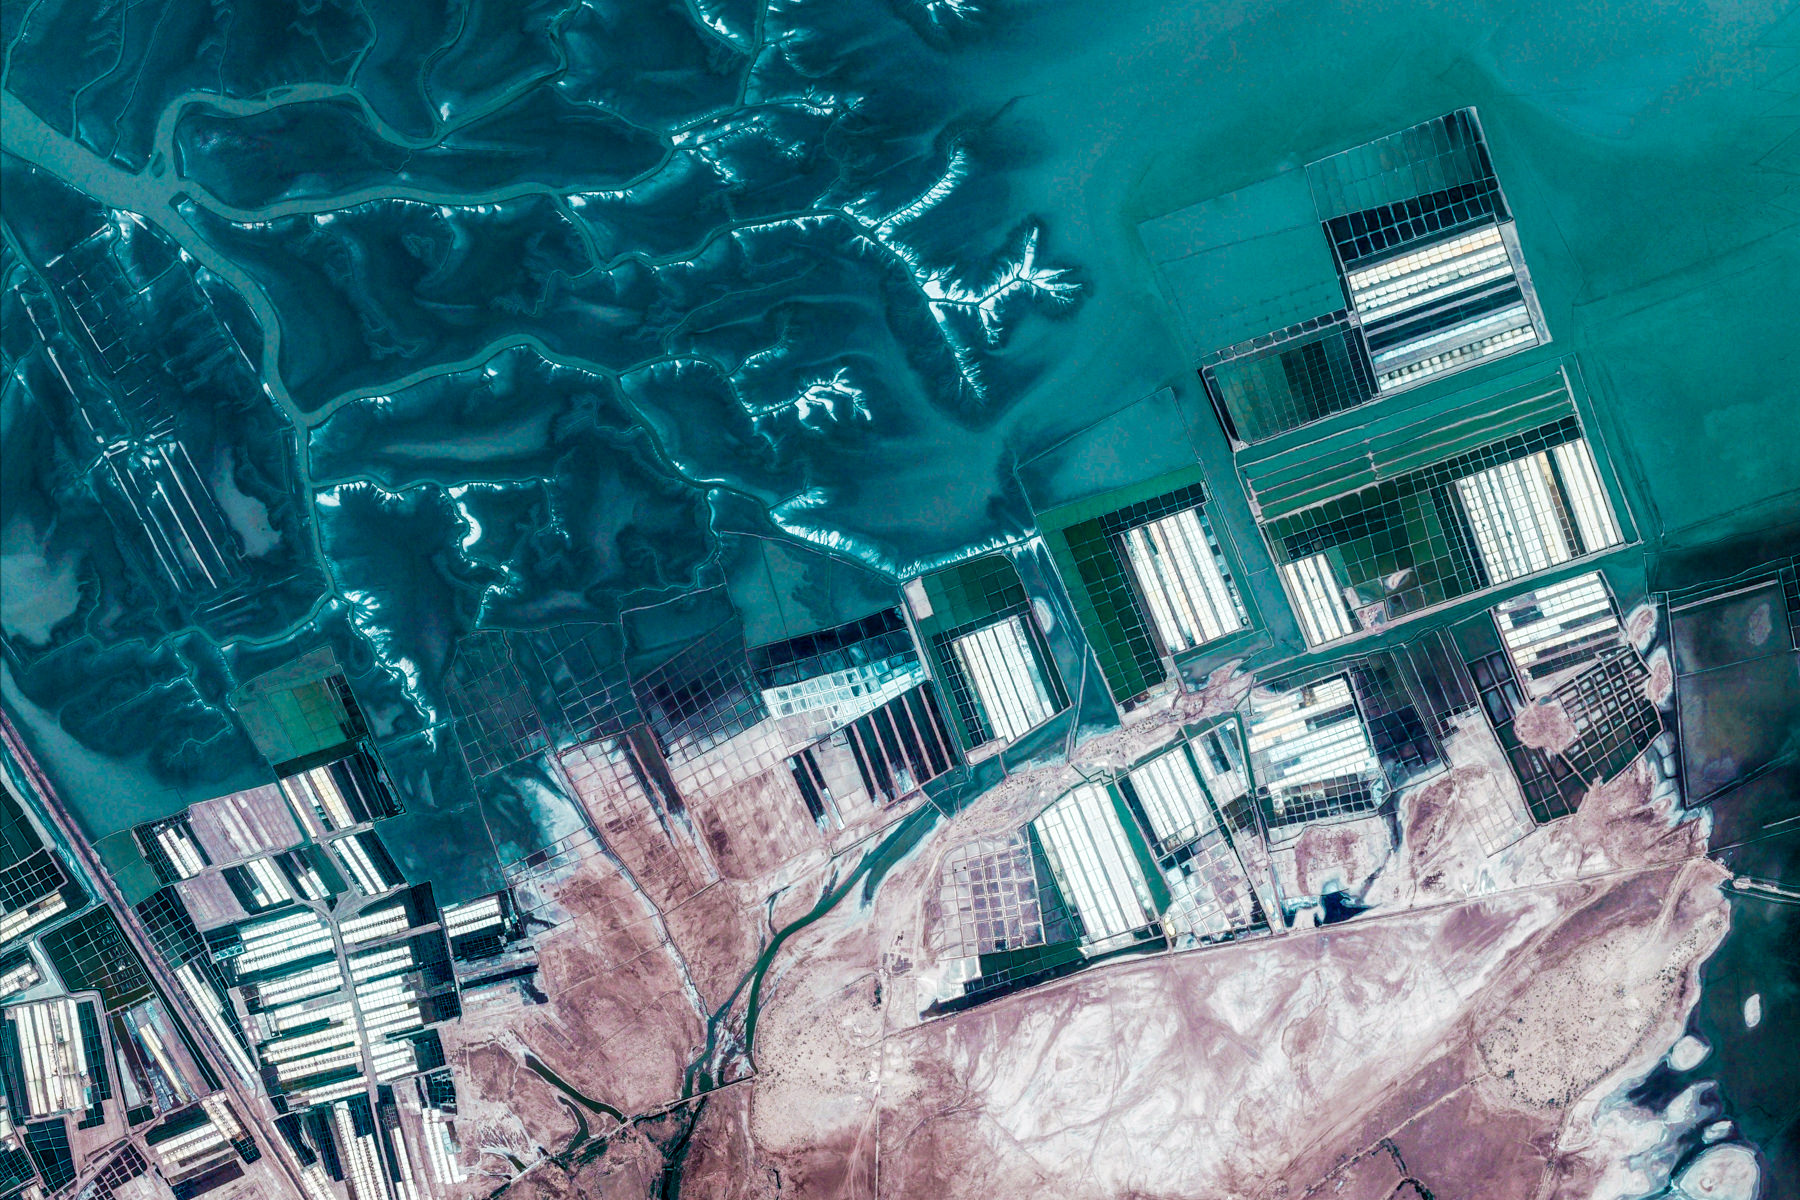

In [2]:
image_url = "https://github.com/andandandand/images-for-colab-notebooks/blob/main/gujarat_indien.jpeg?raw=true"
image_np_array = io.imread(image_url)
Image.fromarray(image_np_array)

In [3]:
# NumPy uses Height, Width, Channels (H, W, C) to represent images
image_np_array.shape

(1200, 1800, 3)

In [4]:
# PyTorch uses Channels, Height, Width (C, H, W) to represent images
torch_image = transforms.ToImage()(image_np_array)
torch_image.shape

torch.Size([3, 1200, 1800])

In [5]:
# This reshapes the tensor to NumPy's standard, which is required by matplotlib
torch_image.permute(1, 2, 0).shape

torch.Size([1200, 1800, 3])

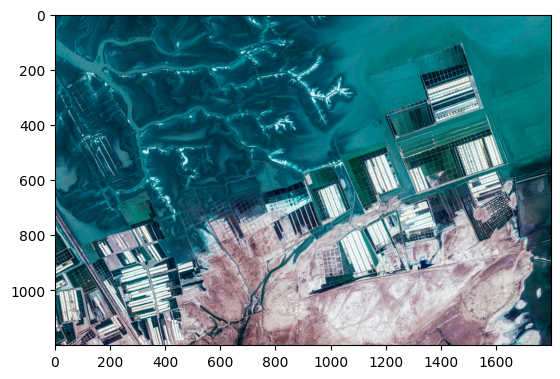

In [6]:
# Matplotlib turns expects (H, W, C) images
plt.imshow(torch_image.permute(1, 2, 0));

## Plotting torch tensors

In [7]:
transform_pipeline = transforms.Compose([
    transforms.ToImage(),  # Converts the input to a PyTorch Image tensor (C, H, W).
                             # Does not change the data type or scale values.
    transforms.ToDtype(torch.float32, scale=True)  # Converts the Image tensor to float32.
                                         # Scales pixel values from [0, 255] to [0.0, 1.0]
                                         # because scale=True.
])

transformed_image = transform_pipeline(image_np_array)

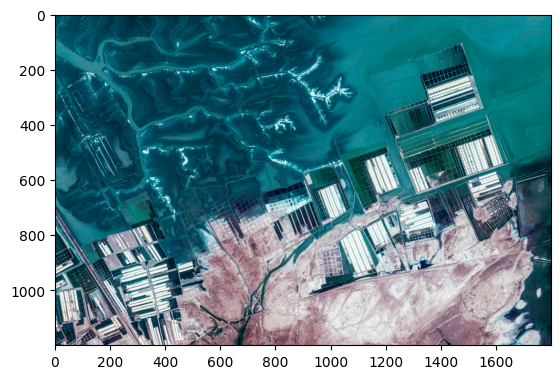

In [8]:
# Notice that the image doesn't visually change when re-scaling the values
plt.imshow(transformed_image.permute(1, 2, 0));

## Feeding data into fully connected or convolutional layers

Convolutional layers require both the `C, H, W` or `N, C, H, W` input formats and the use of `torch.float16` or `torch.float32` tensors.


Fully connected layers like `nn.Linear` require the use of `N, num_features` in  `torch.float16` or `torch.float32` tensors

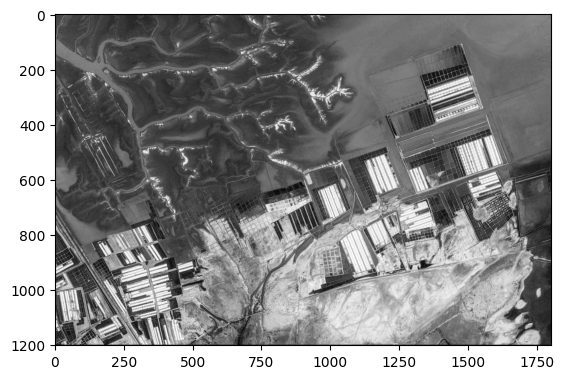

In [9]:
import torch.nn as nn

conv2d_layer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=1, stride=1, padding=1)
plt.imshow(conv2d_layer(transformed_image).detach().squeeze(), cmap='gray');

In [10]:
# This fails complaining about data type mismatch
try:
    conv2d_layer(torch_image)
except RuntimeError as e:
    if "Input type (unsigned char) and bias type (float) should be the same" in str(e):
        print("Error: Input and bias data types mismatch.")
        print("Converting input to float32...")
        output = conv2d_layer(torch_image.type(torch.float32))
        print("Conversion successful. Proceeding with computation.")
    else:
        # Re-raise the exception if it's not the expected error
        raise e

Error: Input and bias data types mismatch.
Converting input to float32...
Conversion successful. Proceeding with computation.
